### Exploratory Analysis of the Users

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

np.random.seed(42)
sns.set_style('ticks')
sns.set_palette('colorblind')

In [42]:
users = pd.read_csv('../data/users.csv')
users.head()

,user_id,user_created,consent,art_knowledge,museum_visits,view_collections,physical_visits,condition,order,age,gender,education,work,disability
0,6737f57f-8646-4c03-9546-8da5a719d226,2022-07-22 08:11:57.353360,1,some,once a month,once a week,once a year,concatenated,model,30-39,male,masters,student,not disabled
1,86b266c0-920c-4e83-802d-0083a06f3f1d,2022-07-22 12:20:43.225033,1,knowledgeable,most days,most days,once a year,image,model,21-29,female,high-school,employed,disabled
2,62b14681-8d4a-44b5-a201-942bba9b4bd8,2022-07-22 13:45:02.013320,1,novice,once a year,first time,two or three years,image,model,30-39,male,masters,employed,not disabled
3,09cf0e31-cf99-47f3-906f-8da336f23f73,2022-07-22 13:45:43.294777,1,novice,once a year,once a year,two or three years,meta,model,30-39,nonbinary,bachelors,employed,not disabled
4,27405dfe-adee-47e8-b002-818e61c5c552,2022-07-22 14:36:52.999452,1,some,first time,once a year,once a year,image,model,21-29,male,masters,student,not disabled


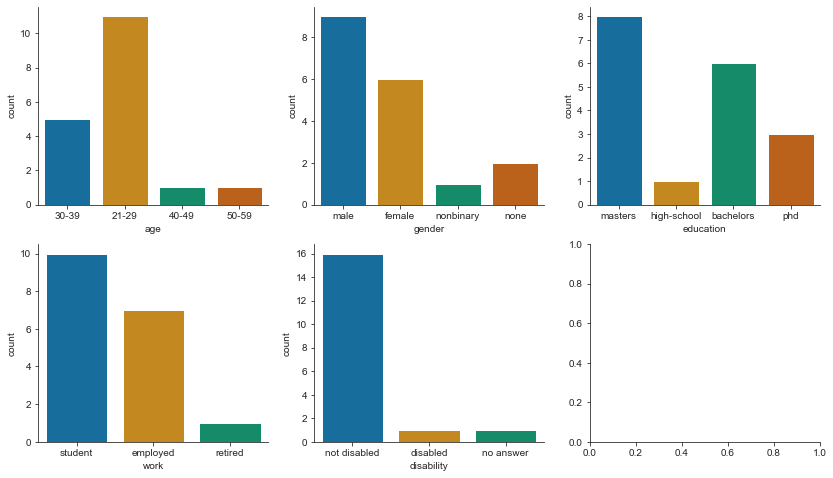

In [43]:
# Get some basic statistics on the demographics
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8))
axes = axes.ravel()

for ax, demo in zip(axes, ['age', 'gender', 'education', 'work', 'disability']):
    p = sns.countplot(x = demo, data = users, ax = ax)

sns.despine()

In [44]:
users.columns

Index(['user_id', 'user_created', 'consent', 'art_knowledge', 'museum_visits',
       'view_collections', 'physical_visits', 'condition', 'order', 'age',
       'gender', 'education', 'work', 'disability'],
      dtype='object')

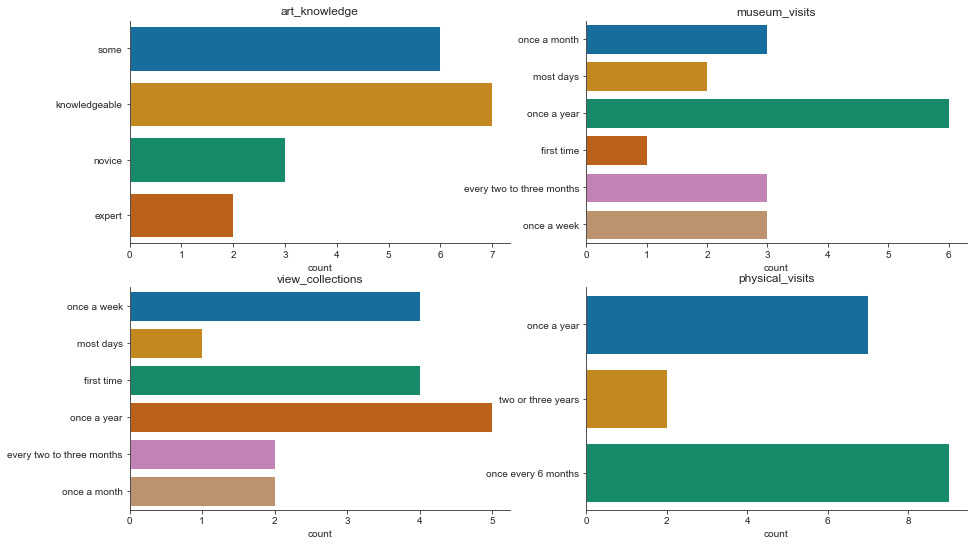

In [45]:
# Visualise statistics on museum visits
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 9))
axes = axes.ravel()

for ax, demo in zip(axes, ['art_knowledge', 'museum_visits', 'view_collections', 'physical_visits']):
    p = sns.countplot(y = demo, data = users, ax = ax, orient='h')
    p.set(
        ylabel = '',
        title = demo
    )   

sns.despine()

In [46]:
users['condition'].value_counts()

concatenated    8
image           7
meta            3
Name: condition, dtype: int64

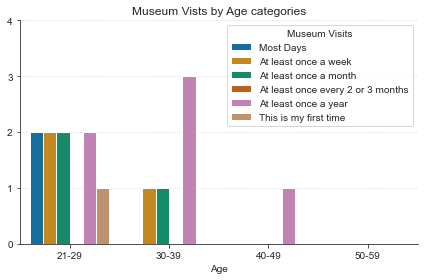

In [50]:
hue_order = ['most days', 'once a week', 'once a month', 'every two or three months', 'once a year', 'first time']
data_order = ['21-29', '30-39', '40-49', '50-59']

p = sns.countplot(
    x = 'age', hue = 'museum_visits', 
    data = users, 
    hue_order = hue_order, order = data_order,
    palette = sns.color_palette('colorblind')
)

p.set(
    xlabel = 'Age',
    ylabel = '',
    yticks = [0, 1, 2, 3, 4],
    title = 'Museum Vists by Age categories'
)
p.yaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
plt.legend(
    title = 'Museum Visits', 
    loc = 'upper right', 
    labels = [
        'Most Days', 'At least once a week', 'At least once a month', 
        'At least once every 2 or 3 months', 'At least once a year', 
        'This is my first time'
    ])

sns.despine()
plt.tight_layout()
plt.show()